# Problem Set 2: Differentiation
***

In [1]:
import sympy as sym
import numpy as np
from matplotlib import pyplot as plt
import random
import time
from autograd import grad

## Problem 1

Step 1: Create the function $f(x) = (\sin(x)+1) ^ {\sin(\cos(x))}$ and define $f'x$.

In [2]:
x = sym.symbols('x')
expr = (sym.sin(x) + 1)**(sym.sin((sym.cos(x))))
deriv = sym.diff(expr, x)

Step 2: Lambdify both expressions

In [3]:
expr_lamb = sym.lambdify([x], expr)
deriv_lamb = sym.lambdify([x], deriv)

Step 3: Plotting

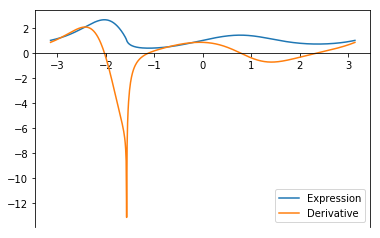

In [4]:
# Creating the list of x values. 
vals = np.arange(-np.pi, np.pi, 0.01)

# Create the plot
ax = plt.gca()
plt.plot(vals, expr_lamb(vals), label="Expression")
plt.plot(vals, deriv_lamb(vals), label="Derivative")
plt.legend()
ax.spines["bottom"].set_position("zero")

We see that between negative one and negative two, there is a discontinuous jump in the expression function.

## Problem 2
Step 1: inputing all the functions in

In [5]:
# Since we the x0 can be inputed as an array, must make sure a singleton is converted into an array.
def as_list(x):
    if type(x) is list:
        return x
    else:
        return [x]

# Note: all the funct arguments require lambdified functions. 
def forw1(funct, init, step):
    initial = as_list(init)
    pos_stp = [i + step for i in initial] #stp for step
    return (funct(pos_stp)-funct(initial))/(step)

def forw2(funct, init, step):
    initial = as_list(init)
    pos_stp = [i + step for i in initial]
    pos_std = [i + 2*step for i in initial]
    return (-3*funct(initial)+4*funct(pos_stp)-funct(pos_std))/(2*step) #std for stride

def back1(funct, init, step):
    initial = as_list(init)
    neg_stp = [i - step for i in initial]
    return (funct(initial)-funct(neg_stp))/(step)

def back2(funct, init, step):
    initial = as_list(init)
    neg_stp = [i - step for i in initial]
    neg_std = [i - 2*step for i in initial] 
    return (3*funct(initial)-4*funct(neg_stp)+funct(neg_std))/(2*step)

def cent2(funct, init, step):
    initial = as_list(init)
    neg_stp = [i - step for i in initial]
    pos_stp = [i + step for i in initial]
    return (funct(pos_stp) - funct(neg_stp))/(2*step)

def cent4(funct, init, step):
    initial = as_list(init)
    neg_stp = [i - step for i in initial]
    neg_std = [i - 2*step for i in initial]
    pos_stp = [i + step for i in initial]
    pos_std = [i + 2*step for i in initial]
    return (funct(neg_std) - 8*funct(neg_stp) + 8*funct(pos_stp)-funct(pos_std))/ (12*step)


Step 2: Making sure the approximations are not "too far off"

In [6]:
# Making sure the values are reasonably close. 
print(forw1(expr_lamb, 0, 0.01))
print(forw2(expr_lamb, 0, 0.01))
print(back1(expr_lamb, 0, 0.01))
print(back2(expr_lamb, 0, 0.01))
print(cent2(expr_lamb, 0, 0.01))
print(cent4(expr_lamb, 0, 0.01))
print(deriv_lamb(0))

[0.84076545]
[0.84154842]
[0.84209959]
[0.84154741]
[0.84143252]
[0.84147098]
0.8414709848078965


Step 3: Plot approximated derivatives of sin-cos expression over $[-\pi, \pi]$. I made the steps to be 0.1 so that the curves do not overlay each other too much. We see that with this level of h=0.1, the approximation of the derivative is pretty good except for when it's near the singularity. 

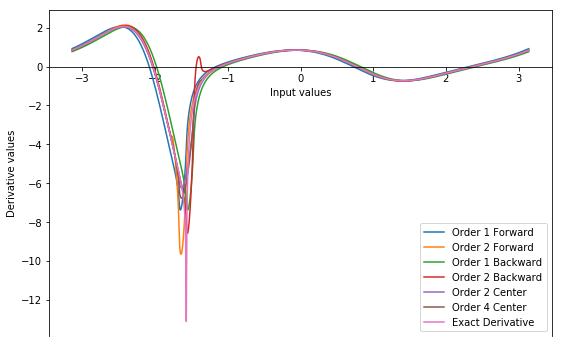

In [7]:
# Create the plot
fig = plt.subplots(figsize=(9, 6)) 
ax = plt.gca()
plt.plot(vals, forw1(expr_lamb, vals, 0.1)[0], label="Order 1 Forward")
plt.plot(vals, forw2(expr_lamb, vals, 0.1)[0], label="Order 2 Forward")
plt.plot(vals, back1(expr_lamb, vals, 0.1)[0], label="Order 1 Backward")
plt.plot(vals, back2(expr_lamb, vals, 0.1)[0], label="Order 2 Backward")
plt.plot(vals, cent2(expr_lamb, vals, 0.1)[0], label="Order 2 Center")
plt.plot(vals, cent4(expr_lamb, vals, 0.1)[0], label="Order 4 Center")

plt.plot(vals, deriv_lamb(vals), label="Exact Derivative")
plt.xlabel("Input values")
plt.ylabel("Derivative values")
plt.legend()
ax.spines["bottom"].set_position("zero")

## Problem 3
Step 1: Create absolute error functions for each of the derivative approximations.

In [8]:
def err_forw1(init, steps):
    error = []
    for step in steps:
        error.append(np.abs(deriv_lamb(init)-forw1(expr_lamb, init, step))[0])
    return error

def err_forw2(init, steps):
    error = []
    for step in steps:
        error.append(np.abs(deriv_lamb(init)-forw2(expr_lamb, init, step))[0])
    return error

def err_back1(init, steps):
    error = []
    for step in steps:
        error.append(np.abs(deriv_lamb(init)-back1(expr_lamb, init, step))[0])
    return error

def err_back2(init, steps):
    error = []
    for step in steps:
        error.append(np.abs(deriv_lamb(init)-back2(expr_lamb, init, step))[0])
    return error

def err_cent2(init, steps):
    error = []
    for step in steps:
        error.append(np.abs(deriv_lamb(init)-cent2(expr_lamb, init, step))[0])
    return error

def err_cent4(init, steps):
    error = []
    for step in steps:
        error.append(np.abs(deriv_lamb(init)-cent4(expr_lamb, init, step))[0])
    return error

Step 2: Graph it for $h=10^{-8}, 10^{-7} ..., 10^{-1}, 1$. Since the text used $x_0 = 1$, I'll follow the convention. 

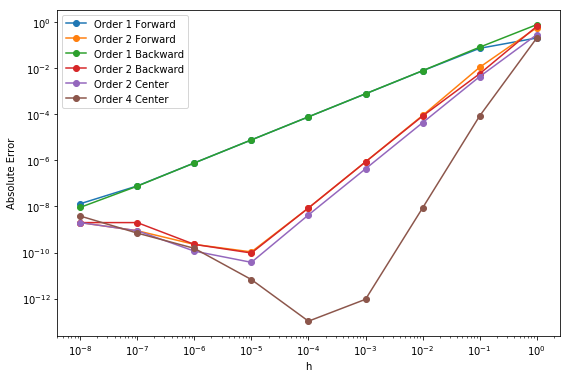

In [9]:
# Creating the list of h values
h = np.logspace(-8, 0, 9) # Get 9 values from 1e-8 to 1e0

# Create the plot
fig = plt.subplots(figsize=(9, 6)) 
ax = plt.loglog()
plt.plot(h, err_forw1(1, h),'o-', label="Order 1 Forward")
plt.plot(h, err_forw2(1, h),'o-', label="Order 2 Forward")
plt.plot(h, err_back1(1, h),'o-', label="Order 1 Backward")
plt.plot(h, err_back2(1, h),'o-', label="Order 2 Backward")
plt.plot(h, err_cent2(1, h),'o-', label="Order 2 Center")
plt.plot(h, err_cent4(1, h),'o-', label="Order 4 Center")
plt.legend()
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.show()

## Problem 4
Step 1: Import my data

In [10]:
# Since data is in same directory as this Jupyter Notebook, no need to specify file path.
data = np.load("plane.npy")
# Check data is loaded and is an array
print(data)

[[ 7.   56.25 67.54]
 [ 8.   55.53 66.57]
 [ 9.   54.8  65.59]
 [10.   54.06 64.59]
 [11.   53.34 63.62]
 [12.   52.69 62.74]
 [13.   51.94 61.72]
 [14.   51.28 60.82]]


Step 2: calculate positions x and y. I see that from the data, there are 8 obersvations, the zeroth index is time, first is $\alpha$ and the seond is $\beta$. Angles are measured in degrees. 

In [11]:
def find_position(time, alpha, beta):
    alpha = np.deg2rad(alpha)
    beta = np.deg2rad(beta)
    x = (alpha * np.tan(beta))/(np.tan(beta)-np.tan(alpha))
    y = (alpha * np.tan(beta) * np.tan(alpha))/ (np.tan(beta)-np.tan(alpha))
    return [int(time), x, y]

# Show position
posit = []
for d in data:
    # Get me position 
    posit.append(find_position(*d))
position = np.array(posit)
print (position)

[[ 7.          2.57467525  3.85327381]
 [ 8.          2.62829664  3.82848822]
 [ 9.          2.68170287  3.80155616]
 [10.          2.73716036  3.77568644]
 [11.          2.79034431  3.74899348]
 [12.          2.83939821  3.72589373]
 [13.          2.89732577  3.70041395]
 [14.          2.94921296  3.67858727]]


Step 3: Define velocity function at time t. I approached this problem through error handling. It is possible to do this through three if/elif statments.

In [12]:
def find_velocity(data, wanted_time):
    # The reason for forward difference quotient for t=7 (backward for t=14) is because there's no data before t=7 (after t=14)
    time = int(wanted_time)-data.shape[0] # reindex time.
    minus_time = data[time: time+1]
    current_time = data[time+1:time+2]
    plus_time = data[time+2:time+3]
        
    try:
        # Not at boundary
        current_time_t = current_time[0][0]
        current_time_x = current_time[0][1]
        current_time_y = current_time[0][2]
        minus_time_t = minus_time[0][0]
        minus_time_x = minus_time[0][1]
        minus_time_y = minus_time[0][2]
        plus_time_t = plus_time[0][0]
        plus_time_x = plus_time[0][1]
        plus_time_y = plus_time[0][2]

        approx_x = (plus_time_x - minus_time_x)/(plus_time_t-minus_time_t)
        approx_y = (plus_time_y - minus_time_y)/(plus_time_t-minus_time_t)
        vel = np.sqrt(approx_x**2 + approx_y**2) * 3600
        return ["t="+str(int(wanted_time)), str(round(vel,3))+"m/s", str(round(3.6*vel,3))+"km/hr"]  # Output tuple with (m/s , km/h)
    
    except IndexError:
        if time < 0:
            # At lower bound, use forward approx
            current_time_t = current_time[0][0]
            current_time_x = current_time[0][1]
            current_time_y = current_time[0][2]
            plus_time_t = plus_time[0][0]
            plus_time_x = plus_time[0][1]
            plus_time_y = plus_time[0][2]
            
            approx_x = (plus_time_x - current_time_x)/(plus_time_t-current_time_t)
            approx_y = (plus_time_y - current_time_y)/(plus_time_t-current_time_t)
            vel = np.sqrt(approx_x**2 + approx_y**2) * 3600
            return ["t="+str(int(wanted_time)), str(round(vel,3))+"m/s", str(round(3.6*vel,3))+"km/hr"]  # Output tuple with (m/s , km/h)
        
        else: 
            # At Upper bound, use backward approx
            current_time_t = current_time[0][0]
            current_time_x = current_time[0][1]
            current_time_y = current_time[0][2]
            minus_time_t = minus_time[0][0]
            minus_time_x = minus_time[0][1]
            minus_time_y = minus_time[0][2]

            approx_x = (current_time_x - minus_time_x)/(current_time_t-minus_time_t)
            approx_y = (current_time_y - minus_time_y)/(current_time_t-minus_time_t)
            vel = np.sqrt(approx_x**2 + approx_y**2) * 3600
            return ["t="+str(int(wanted_time)), str(round(vel,3))+"m/s", str(round(3.6*vel,3))+"km/hr"]  # Output tuple with (m/s , km/h)

Step 4: Output the velocities.

In [13]:
calculated_vel = []
for i in range (7,15):
    calculated_vel.append(find_velocity(position, i))
    
print(np.array(calculated_vel))    

[['t=7' '212.662m/s' '765.582km/hr']
 ['t=8' '213.963m/s' '770.265km/hr']
 ['t=9' '217.788m/s' '784.035km/hr']
 ['t=10' '217.24m/s' '782.064km/hr']
 ['t=11' '204.693m/s' '736.896km/hr']
 ['t=12' '211.49m/s' '761.366km/hr']
 ['t=13' '215.227m/s' '774.819km/hr']
 ['t=14' '202.648m/s' '729.532km/hr']]


## Problem 5
Overall steps: Since the wording of the problem is very gerenal, my solution to this is also pretty general. I create a class of multivariate functions that take in n-dimensional input and returns m-dimensional values. Within this class, I implement a method for an estimate (2nd order centered) of the Jacobian evaluated at some initial point $x_0\in \mathbb{R}^n$. I have ingored error handling.

In [14]:
# To keep it as general as I can, I'll define the function as a class; the Jacobian of the function as a method.
class multi_funct():
    def __init__(self, var, exp):
        self.var = var
        self.exp = exp
        
        self.variables = sym.symbols(var) # Converts the string of variables to sympy symbols.
        self.expression = sym.sympify(exp) # Converts the string of expression to sympy expression. 
        self.in_dim = np.shape(self.variables) # Gives me the input dimension, n
        self.out_dim = np.shape(self.expression) # Gives me the output dimension, m
    
    def print_attributes(self):
        print("Returns (variables, expression, input dimension (n), output dimension (m))") 
        return self.variables, self.expression, self.in_dim, self.out_dim
    
    def _eval(self, init): # Have a method handy to directly plug and go using the function already lambdified. 
        H =sym.lambdify(self.variables, np.asarray(self.expression).transpose(), "numpy")
        return H(*init)
    
    def _approximate(self, init, step):
        
        # Creating the positive steps
        pos_step = []
        f_pos = []
        for i in range(self.in_dim[0]):
            for j in range(self.out_dim[0]):
                ej = [0] * self.out_dim[0]
                ej[j] = float(step)
                pos_step.append(map(sum, zip(init,ej)))
            f_pos.append(self._eval(pos_step[i]))
        
        # Creating the negative steps
        neg_step = []
        f_neg = []
        for i in range(self.out_dim[0]):
            for j in range(self.in_dim[0]):
                ej = [0] * self.in_dim[0]
                ej[j] = -float(step)
                neg_step.append(map(sum, zip(init,ej)))
            f_neg.append(self._eval(neg_step[i]))
        
        # Evaluating
        result = [[f_pos[i][j] - f_neg[i][j]  for j in range(len(f_pos[0]))] for i in range(len(f_pos))] # Matrix addition
        return (np.multiply(result, 1/(2*step))).transpose()
        
        
f = multi_funct(["x", "y", "z"], ["x**2+10", "4*y", "x"])
f._approximate([0,1, 0], 0.01)

array([[0., 0., 0.],
       [0., 4., 0.],
       [1., 0., 0.]])

It passes the simple test of the Jacobian of $f(x, y, z) = (x^2+10, 4y, x)$ at $(x,y,z)=(0,1,0)$. It also passes the simple test for $f(x,y)=[x^2, x^3-y]$ as recommend by the text. The test points were (0,0) and (1,1).

In [15]:
test = multi_funct(["x", "y"], ["x**2", "x**3-y"])
print("Check using (0,0).")
print(test._approximate([0,0], 0.01))

print("Double Check using (1,1), as instructed by text.")
print(test._approximate([1,1], 0.01))

Check using (0,0).
[[ 0.e+00  0.e+00]
 [ 1.e-04 -1.e+00]]
Double Check using (1,1), as instructed by text.
[[ 2.      0.    ]
 [ 3.0001 -1.    ]]


## Problem 7
Step 1: Given some N value, create functions that return both the run-time and absolute error. Note, that in each iteration, a new random $x_0$ is selected.

In [16]:
def sympy_errTime_direct(N=5):
    run_time = []
    abs_error = [1e-18]*N
    for iteration in range(N):
        x_0 = random.random()
        start_time = time.perf_counter()# start timer
        sympy_val = deriv_lamb(x_0)
        duration = time.perf_counter()-start_time # end timer
        
        run_time.append(duration)
    return run_time, abs_error    
    

def dquo_errTime(N=5):
    run_time = []
    abs_error = []
    for iteration in range(N):
        x_0 = random.random()
        sympy_val = deriv_lamb(x_0)
        
        start_time = time.perf_counter() #start timer
        dquo_val = cent4(expr_lamb, x_0, 10e-4)
        duration = time.perf_counter ()-start_time #end timer
        
        run_time.append(duration)
        abs_error.append(np.abs(dquo_val-sympy_val)[0])
    return run_time, abs_error

def agrad_errTime(N=5):
    run_time = []
    abs_error = []
    for iteration in range (N):
        x_0 = random.random()
        sympy_val = deriv_lamb(x_0)
        
        start_time = time.perf_counter()# start timer
        agrad_val = expr_lamb(x_0)
        duration = time.perf_counter()-start_time # end timer
        
        run_time.append(duration)
        abs_error.append(np.abs(agrad_val - sympy_val))
    return run_time, abs_error


Step 3: Plot it all

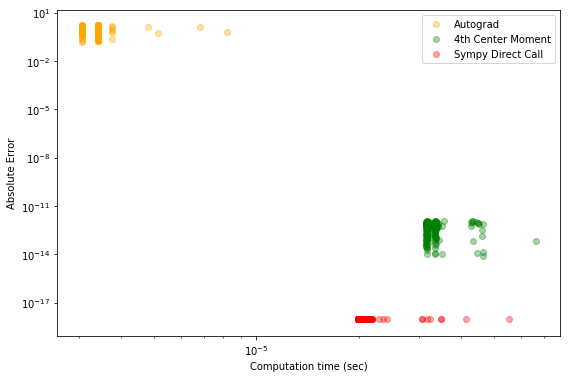

In [17]:
# Create the plot
fig = plt.subplots(figsize=(9, 6)) 

plt.loglog()
plt.scatter(agrad_errTime(200)[0],agrad_errTime(200)[1],alpha=0.35, label="Autograd", color='orange')
plt.scatter(dquo_errTime(200)[0],dquo_errTime(200)[1],alpha=0.35, label="4th Center Moment", color='g')
plt.scatter(sympy_errTime_direct(200)[0],sympy_errTime_direct(200)[1],alpha=0.35, label="Sympy Direct Call", color='r')
plt.legend()
plt.xlabel("Computation time (sec)")
plt.ylabel("Absolute Error")
plt.show()

__A quick note on why I think the above graph does not look like the graph shown in the text__

*TL;DR. The timing process above for sympy calculations only included the evaluation process of the already-lambdified expression. This should be very fast and roughly the same processing time as the 2nd moment approximation. The text calls the entire process of defining and differentiating the expression from scratch every iteration.*

The initial hypothesis was that sympy found a way to optimize their compuational algorithm quite significantly over the years since the text was printed. I do not think that this is the case. In our <span style="color:orange"> fourth order centered approximation </span>of the derivative, it literally only involves addition, subtraction, multiplication and division (the evaluation of sine and cosine can be approximated by the previous arithmetic processes). Sympy differentiation package cannot do better than this because those four aforementioned processes are the most basic operations (somewhere in Sympy's apporximation, it'll call upon those operations as well). Furthermore, if Sympy was able to find a more efficient algorithm, it'll mean that numpy is "not efficient". That does not seem palatable. 

I think the problem with the above figure is that we've cheated. If we look at what the <span style="color:orange"> centered momement approximation </span> is doing: it's taking in the function in some abstract form, and then using that to approximate the derivative value. For <span style="color:blue"> autograd </span>, it's doing the same thing: it's taking in the function as a whole, and then performing the gradient (in our case 1 univariate) on the expression. Yet, when it comes around to sympy, we direcly called the . This isn't all of sympy's computation process: 1) it must take in some abstract expression; 2) differentiate with respect to the variable of interest; 3) Lambdify it and evaluate at $x_0$. If we look at the code above, we have entirely skipped steps 1 and 2.... And step 3, which consists of arithmetic computations, should be on the same runtime complexity as with the fourth centered moment. For this reason, I coin this sympy run time evaluation <span style="color:red"> "Sympy Direct Call" </span>.

The following block of code rectifies the above problem through the newly defined sympy_errTime function. 

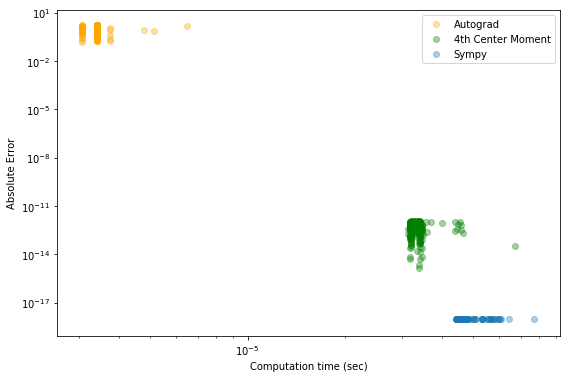

In [18]:
def sympy_errTime(N=5):
    run_time = []
    abs_error = [1e-18]*N
    for iteration in range(N):
        x_0 = random.random()
        x = sym.symbols('x')
        deriv = sym.diff((sym.sin(x) + 1)**(sym.sin((sym.cos(x)))), x)
        deriv_lamb = sym.lambdify([x], deriv)
        start_time = time.perf_counter()# start timer
        sympy_val = deriv_lamb(x_0)
        duration = time.perf_counter()-start_time # end timer
        
        run_time.append(duration)
    return run_time, abs_error    

# Create the plot
fig = plt.subplots(figsize=(9, 6)) 

plt.loglog()
plt.scatter(agrad_errTime(200)[0],agrad_errTime(200)[1],alpha=0.35, label="Autograd", color='orange')
plt.scatter(dquo_errTime(200)[0],dquo_errTime(200)[1],alpha=0.35, label="4th Center Moment", color='g')
plt.scatter(sympy_errTime(200)[0],sympy_errTime(200)[1],alpha=0.35, label="Sympy")
plt.legend()
plt.xlabel("Computation time (sec)")
plt.ylabel("Absolute Error")
plt.show()